# Kaplan-Meier Survival Analysis

The Kaplan-Meier estimator is a non-parametric method used to estimate the survival function from lifetime data. It's particularly useful in medical research, engineering, and other fields where we need to understand the probability of an event (like death, failure, or recovery) occurring over time.

In this notebook, we'll use the **mastectomy dataset**, which contains information about breast cancer patients and their survival times. We'll demonstrate how to use PyBH's `SurvivalAnalysis` class with the Kaplan-Meier model from `lifelines` to analyze survival data.


## Understanding the Kaplan-Meier Estimator

The Kaplan-Meier estimator provides a way to estimate the survival function $S(t)$, which represents the probability that a subject survives longer than time $t$. The estimator is particularly useful because it can handle **censored data** - cases where we don't observe the event of interest (e.g., a patient is still alive at the end of the study).

The formula for the Kaplan-Meier estimator is:

$$S(t) = \prod_{i: t_i \leq t} \left(1 - \frac{d_i}{n_i}\right)$$

where:
- $d_i$ is the number of events at time $t_i$
- $n_i$ is the number of subjects at risk just before time $t_i$


## Imports

First, let's import the necessary libraries:


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
from lifelines import KaplanMeierFitter
from PyBH.SurvivalAnalysis.SurvivalAnalysis import SurvivalAnalysis

## Loading the Mastectomy Dataset

The mastectomy dataset contains information about breast cancer patients, including:
- **time**: Survival time in months
- **event**: Whether the event (death) was observed (1) or censored (0)
- **metastasized**: Whether the cancer had metastasized (yes/no)

Let's load the dataset using PyMC's data loading utility:


In [3]:
# Load the mastectomy dataset using PyMC's get_data function
data = pd.read_csv(pm.get_data("mastectomy.csv"))

print("Dataset loaded successfully!")
print(f"Shape: {data.shape}")
print(f"\nColumns: {data.columns.tolist()}")
print(f"\nFirst few rows:")
print(data.head())


Dataset loaded successfully!
Shape: (44, 3)

Columns: ['time', 'event', 'metastasized']

First few rows:
   time  event metastasized
0    23   True           no
1    47   True           no
2    69   True           no
3    70  False           no
4   100  False           no


## Data Exploration

Let's explore the dataset to understand its structure:


In [4]:
# Basic statistics
print("Dataset Summary:")
print(f"Total patients: {len(data)}")
print(f"\nEvent statistics:")
print(f"  - Events observed: {data['event'].sum()}")
print(f"  - Censored: {(data['event'] == 0).sum()}")
print(f"\nMetastasis status:")
print(data['metastasized'].value_counts())
print(f"\nTime statistics:")
print(data['time'].describe())


Dataset Summary:
Total patients: 44

Event statistics:
  - Events observed: 26
  - Censored: 18

Metastasis status:
metastasized
yes    32
no     12
Name: count, dtype: int64

Time statistics:
count     44.000000
mean      96.613636
std       69.866389
min        5.000000
25%       38.750000
50%       73.500000
75%      145.750000
max      225.000000
Name: time, dtype: float64


## Using PyBH's SurvivalAnalysis with Kaplan-Meier

Now, let's use PyBH's `SurvivalAnalysis` class with the Kaplan-Meier model from `lifelines`. The `SurvivalAnalysis` class acts as a workflow manager that handles data validation, preprocessing, and model fitting automatically.


In [5]:
# Initialize the Kaplan-Meier Fitter from lifelines
kmf = KaplanMeierFitter()

# Use PyBH's SurvivalAnalysis class to fit the model
# This automatically handles validation and preprocessing
survival_analysis = SurvivalAnalysis(
    model=kmf,
    data=data,
    time_col='time',
    event_col='event'
)


   -> Mode: Frequentist (Lifelines)


## Visualizing the Survival Function

Now let's plot the survival function to see how the probability of survival changes over time:


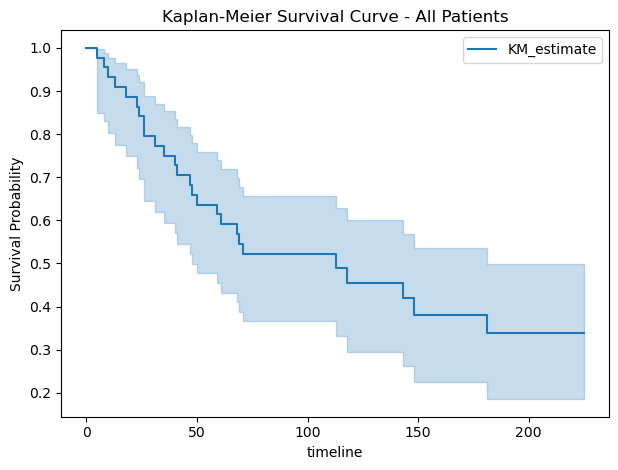

In [9]:
# Plot the survival function using PyBH's built-in method
plt.title('Kaplan-Meier Survival Curve - All Patients')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.tight_layout()

survival_analysis.plot_survival_function()

plt.show()


## Comparing Survival by Metastasis Status

One of the key advantages of survival analysis is the ability to compare survival curves between different groups. Let's compare the survival of patients with and without metastasis:


   -> Mode: Frequentist (Lifelines)
   -> Mode: Frequentist (Lifelines)


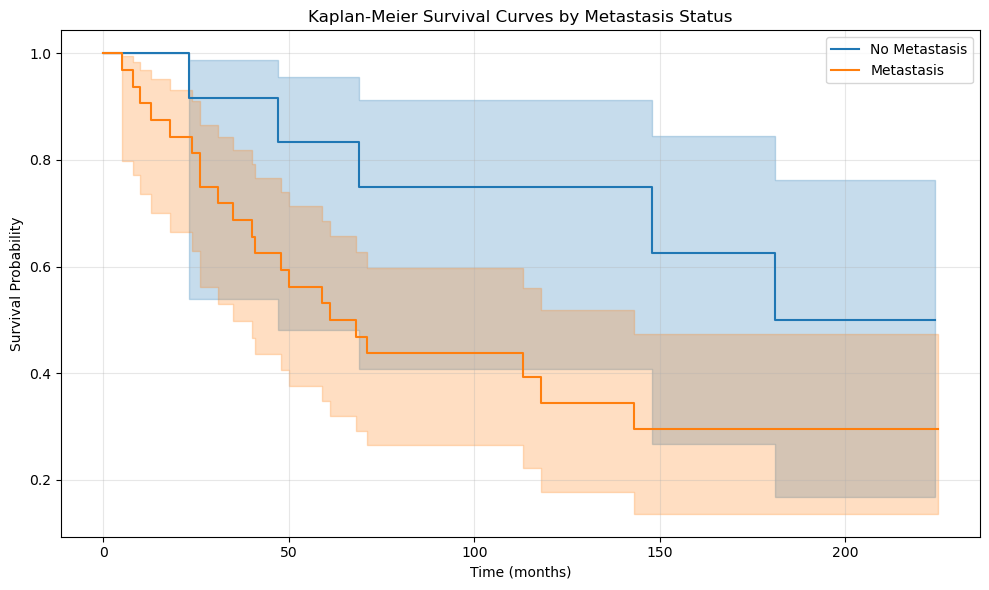

In [10]:
# Create separate Kaplan-Meier models for each group
kmf_no_meta = KaplanMeierFitter()
kmf_yes_meta = KaplanMeierFitter()

# Fit models for each group using PyBH
survival_no_meta = SurvivalAnalysis(
    model=kmf_no_meta,
    data=data[data['metastasized'] == 'no'],
    time_col='time',
    event_col='event'
)

survival_yes_meta = SurvivalAnalysis(
    model=kmf_yes_meta,
    data=data[data['metastasized'] == 'yes'],
    time_col='time',
    event_col='event'
)

# Plot both survival curves
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

kmf_no_meta.plot_survival_function(ax=ax, label='No Metastasis')
kmf_yes_meta.plot_survival_function(ax=ax, label='Metastasis')

plt.title('Kaplan-Meier Survival Curves by Metastasis Status')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Median Survival Time

The median survival time is the time at which 50% of the subjects have experienced the event:


In [12]:
print("Median Survival Times:")
print(f"  All patients: {kmf.median_survival_time_:.2f} months")
print(f"  No metastasis: {kmf_no_meta.median_survival_time_:.2f} months")
print(f"  With metastasis: {kmf_yes_meta.median_survival_time_:.2f} months")


Median Survival Times:
  All patients: 113.00 months
  No metastasis: inf months
  With metastasis: 61.00 months


## Conclusion

This notebook demonstrated how to use PyBH's `SurvivalAnalysis` class with the Kaplan-Meier estimator from `lifelines` to:

1. **Load and preprocess** survival data (the mastectomy dataset)
2. **Fit Kaplan-Meier models** using PyBH's workflow manager
3. **Visualize survival curves** for different patient groups
4. **Compare survival** between groups using statistical tests
5. **Extract survival probabilities** at specific time points

The `SurvivalAnalysis` class simplifies the workflow by automatically handling data validation, preprocessing (including one-hot encoding of categorical variables), and routing to the appropriate model type (Bayesian or frequentist).
